# Stock Price Prediction (Infosys Stock)

Here, I am collecting live stock price data and creating a model to predict the closing price for next 5 days at a time. 
We are predicting for very just 5 days because stock market is highly volatile and predictions are more accurate when we predict for less number of days.

In [1]:
import pandas as pd
import numpy as np

# To remove the scientific notation from numpy arrays
np.set_printoptions(suppress=True)

In [12]:
# Getting Stock data using nsepy library
from nsepy import get_history
from datetime import datetime

startDate=datetime(2019, 1,1)
endDate=datetime(2021, 8, 20)

# Fetching the data
StockData=get_history(symbol='INFY', start=startDate, end=endDate)
print(StockData.shape)
StockData.head()

(654, 14)


,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2019-01-01,INFY,EQ,658.95,660.95,666.3,654.15,665.95,665.05,660.66,2943390,1.944579e+14,45422,1282161,0.4356
2019-01-02,INFY,EQ,665.05,666.00,674.0,662.05,668.00,669.05,669.97,7416655,4.968963e+14,108094,3880800,0.5233
2019-01-03,INFY,EQ,669.05,672.00,677.0,663.10,668.00,669.15,669.66,6827249,4.571929e+14,125781,3676359,0.5385
2019-01-04,INFY,EQ,669.15,671.75,673.9,651.00,660.25,661.05,660.17,7889310,5.208305e+14,187590,3747741,0.4750
2019-01-07,INFY,EQ,661.05,665.00,673.6,661.50,671.70,671.70,667.51,8046340,5.370974e+14,132736,4711672,0.5856


In [13]:
# Creating a column as date
StockData['TradeDate']=StockData.index
StockData.tail()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,TradeDate
Date,,,,,,,,,,,,,,,
2021-08-13,INFY,EQ,1689.60,1697.0,1722.50,1691.30,1713.95,1712.20,1707.76,5612790,9.585319e+14,144604,3335284,0.5942,2021-08-13
2021-08-16,INFY,EQ,1712.20,1707.7,1719.95,1690.10,1702.95,1704.40,1703.86,4564109,7.776599e+14,181480,3300912,0.7232,2021-08-16
2021-08-17,INFY,EQ,1704.40,1703.9,1748.90,1686.55,1737.40,1741.65,1730.04,9510390,1.645334e+15,263393,6316007,0.6641,2021-08-17
2021-08-18,INFY,EQ,1741.65,1729.0,1755.50,1727.00,1732.00,1733.45,1739.38,6686090,1.162962e+15,193759,4490519,0.6716,2021-08-18
2021-08-20,INFY,EQ,1733.45,1716.1,1745.00,1716.10,1729.50,1732.95,1734.19,6206972,1.076408e+15,188065,3883003,0.6256,2021-08-20


## Plotting the closing  prices of stock

<AxesSubplot:xlabel='TradeDate'>

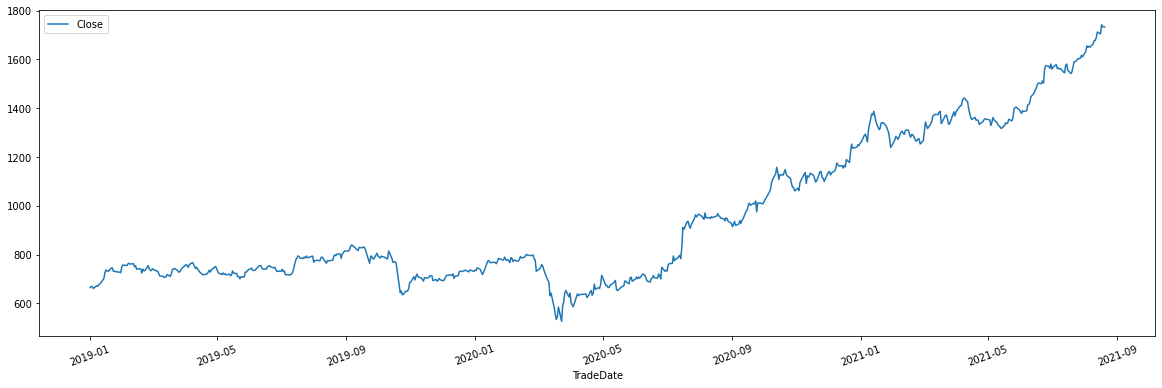

In [14]:
%matplotlib inline
StockData.plot(x='TradeDate', y='Close', kind='line', figsize=(20,6), rot=20)

## Preparing the data

In [15]:
FullData=StockData[['Close']].values
FullData[-20:]

array([[1590.45],
       [1603.9 ],
       [1602.55],
       [1605.6 ],
       [1617.  ],
       [1610.5 ],
       [1631.55],
       [1655.2 ],
       [1649.25],
       [1653.55],
       [1650.2 ],
       [1663.3 ],
       [1677.25],
       [1677.55],
       [1689.6 ],
       [1712.2 ],
       [1704.4 ],
       [1741.65],
       [1733.45],
       [1732.95]])

## Feature Scaling for fast training

In [16]:
# Feature Scaling for fast training of neural networks
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Choosing between Standardization or normalization
#sc = StandardScaler()
sc=MinMaxScaler()

DataScaler = sc.fit(FullData)
X=DataScaler.transform(FullData)
#X=FullData

X[0:5]

array([[0.1140553 ],
       [0.11734694],
       [0.11742923],
       [0.11076366],
       [0.11952765]])

In [17]:
# Printing the last 10 values
print('Original Prices')
print(FullData[-10:])

print('###################')

# Printing last 10 values of the scaled data
# Here I am changing the shape of the data to one dimensional array because
# for Multi step data preparation we need to X input in this fashion
X=X.reshape(X.shape[0],)
print('Scaled Prices')
print(X[-10:])

Original Prices
[[1650.2 ]
 [1663.3 ]
 [1677.25]
 [1677.55]
 [1689.6 ]
 [1712.2 ]
 [1704.4 ]
 [1741.65]
 [1733.45]
 [1732.95]]
###################
Scaled Prices
[0.9247449  0.93552502 0.94700461 0.94725148 0.95716754 0.97576531
 0.96934661 1.         0.99325214 0.99284068]


In [18]:
# Multi step data preparation

# split into samples
X_samples = list()
y_samples = list()

NumerOfRows = len(X)
TimeSteps=10  # next few day's Price Prediction is based on last how many past day's prices
FutureTimeSteps=5 # How many days in future you want to predict the prices

# Iterate thru the values to create combinations
for i in range(TimeSteps , NumerOfRows-FutureTimeSteps , 1):
    x_sample = X[i-TimeSteps:i]
    y_sample = X[i:i+FutureTimeSteps]
    X_samples.append(x_sample)
    y_samples.append(y_sample)

################################################

# Reshape the Input as a 3D (samples, Time Steps, Features)
X_data=np.array(X_samples)
X_data=X_data.reshape(X_data.shape[0],X_data.shape[1], 1)
print('### Input Data Shape ###') 
print(X_data.shape)

# We do not reshape y as a 3D data  as it is supposed to be a single column only
y_data=np.array(y_samples)
print('### Output Data Shape ###') 
print(y_data.shape)

### Input Data Shape ###
(639, 10, 1)
### Output Data Shape ###
(639, 5)


In [19]:
# Choosing the number of testing data records
TestingRecords=5

# Splitting the data into train and test
X_train=X_data[:-TestingRecords]
X_test=X_data[-TestingRecords:]
y_train=y_data[:-TestingRecords]
y_test=y_data[-TestingRecords:]

In [20]:
# Printing the shape of training and testing
print('\n#### Training Data shape ####')
print(X_train.shape)
print(y_train.shape)

print('\n#### Testing Data shape ####')
print(X_test.shape)
print(y_test.shape)


#### Training Data shape ####
(634, 10, 1)
(634, 5)

#### Testing Data shape ####
(5, 10, 1)
(5, 5)


In [21]:
# Visualizing the input and output being sent to the LSTM model
# Based on last 10 days prices we are learning the next 5 days of prices
for inp, out in zip(X_train[0:2], y_train[0:2]):
    print(inp)
    print('====>')
    print(out)
    print('#'*20)

[[0.1140553 ]
 [0.11734694]
 [0.11742923]
 [0.11076366]
 [0.11952765]
 [0.11816985]
 [0.12314845]
 [0.12611093]
 [0.12923799]
 [0.14437953]]
====>
[0.1647054  0.17309908 0.17026004 0.16828506 0.17984694]
####################
[[0.11734694]
 [0.11742923]
 [0.11076366]
 [0.11952765]
 [0.11816985]
 [0.12314845]
 [0.12611093]
 [0.12923799]
 [0.14437953]
 [0.1647054 ]]
====>
[0.17309908 0.17026004 0.16828506 0.17984694 0.18013496]
####################


In [22]:
# Defining Input shapes for LSTM
TimeSteps=X_train.shape[1]
TotalFeatures=X_train.shape[2]
print("Number of TimeSteps:", TimeSteps)
print("Number of Features:", TotalFeatures)

Number of TimeSteps: 10
Number of Features: 1


## Fitting the deep learning model

In [23]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Using TensorFlow backend.


In [24]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
634/634 [==============================] - 11s 18ms/step - loss: 0.1061
Epoch 2/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0221
Epoch 3/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0052
Epoch 4/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0037
Epoch 5/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0029
Epoch 6/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 7/100
634/634 [==============================] - 2s 2ms/step - loss: 0.0021
Epoch 8/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 9/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0021
Epoch 10/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 11/100
634/634 [==============================] - 2s 3ms/step - loss: 0.0019- - ETA: 0s - loss: 0.0
Epoch 12/100
634/634 [==============================] - 2s 3ms/step - l

634/634 [==============================] - 2s 3ms/step - loss: 8.5696e-04
Epoch 98/100
634/634 [==============================] - 2s 3ms/step - loss: 8.9918e-04
Epoch 99/100
634/634 [==============================] - 2s 3ms/step - loss: 8.8819e-04
Epoch 100/100
634/634 [==============================] - 2s 3ms/step - loss: 8.7413e-04
############### Total Time Taken:  3 Minutes #############


## Generating predictions on testing data

In [25]:
# Making predictions on test data
predicted_Price = regressor.predict(X_test)
predicted_Price = DataScaler.inverse_transform(predicted_Price)
print('#### Predicted Prices ####')
print(predicted_Price)

# Getting the original price values for testing data
orig=y_test
orig=DataScaler.inverse_transform(y_test)
print('\n#### Original Prices ####')
print(orig)

#### Predicted Prices ####
[[1609.1128 1674.604  1632.9318 1681.235  1664.6576]
 [1605.8883 1673.0437 1628.7559 1677.7864 1662.2568]
 [1608.5883 1678.8551 1631.6484 1682.6714 1667.0176]
 [1612.7996 1686.602  1636.3994 1689.789  1673.6538]
 [1623.8916 1699.0095 1648.1187 1702.5328 1685.7964]]

#### Original Prices ####
[[1650.2  1663.3  1677.25 1677.55 1689.6 ]
 [1663.3  1677.25 1677.55 1689.6  1712.2 ]
 [1677.25 1677.55 1689.6  1712.2  1704.4 ]
 [1677.55 1689.6  1712.2  1704.4  1741.65]
 [1689.6  1712.2  1704.4  1741.65 1733.45]]


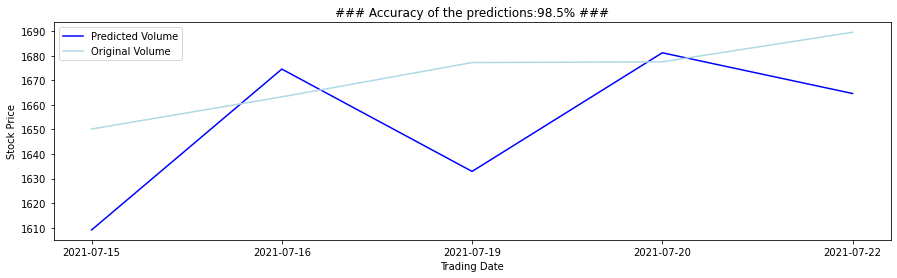

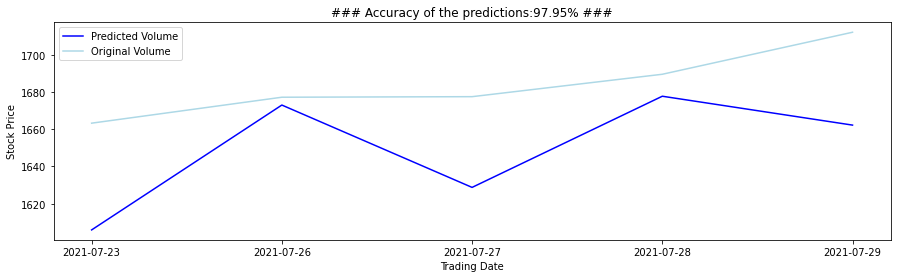

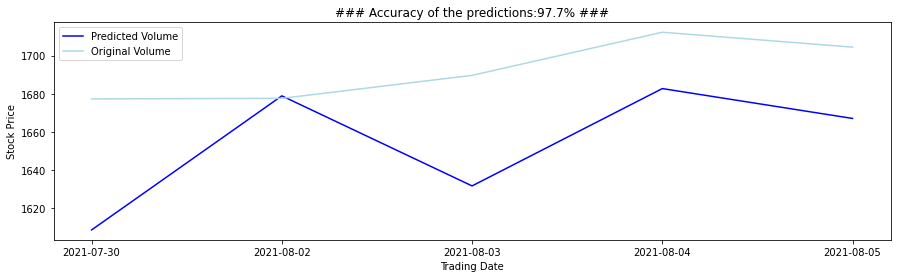

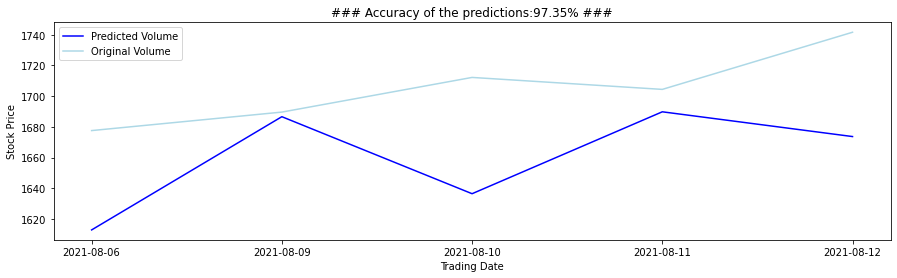

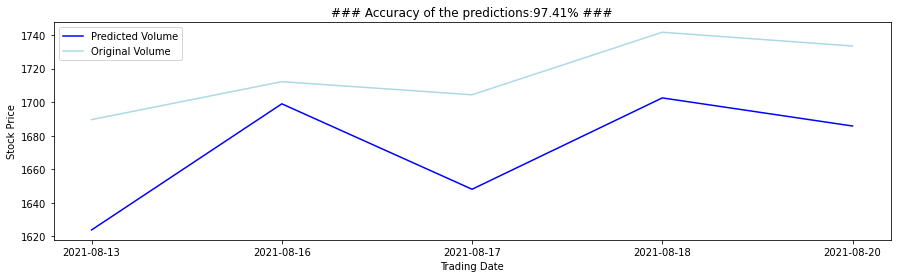

In [26]:
import matplotlib.pyplot as plt

for i in range(len(orig)):
    Prediction=predicted_Price[i]
    Original=orig[i]
    
    # Visualising the results
    plt.plot(Prediction, color = 'blue', label = 'Predicted Volume')
    plt.plot(Original, color = 'lightblue', label = 'Original Volume')

    plt.title('### Accuracy of the predictions:'+ str(100 - (100*(abs(Original-Prediction)/Original)).mean().round(2))+'% ###')
    plt.xlabel('Trading Date')
    
    startDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1)
    endDateIndex=(FutureTimeSteps*TestingRecords)-FutureTimeSteps*(i+1) + FutureTimeSteps
    TotalRows=StockData.shape[0]

    plt.xticks(range(FutureTimeSteps), StockData.iloc[TotalRows-endDateIndex : TotalRows-(startDateIndex) , :]['TradeDate'])
    plt.ylabel('Stock Price')

    plt.legend()
    fig=plt.gcf()
    fig.set_figwidth(15)
    fig.set_figheight(4)
    plt.show()

## Training the model with the entire data

In [28]:
# Initialising the RNN
regressor = Sequential()

# Adding the First input hidden layer and the LSTM layer
# return_sequences = True, means the output of every time step to be shared with hidden next layer
regressor.add(LSTM(units = 10, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))


# Adding the Second hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', input_shape = (TimeSteps, TotalFeatures), return_sequences=True))

# Adding the Third hidden layer and the LSTM layer
regressor.add(LSTM(units = 5, activation = 'relu', return_sequences=False ))


# Adding the output layer
# Notice the number of neurons in the dense layer is now the number of future time steps 
# Based on the number of future days we want to predict
regressor.add(Dense(units = FutureTimeSteps))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [29]:
import time
# Measuring the time taken by the model to train
StartTime=time.time()

# Fitting the RNN to the Training set
regressor.fit(X_data, y_data, batch_size = 5, epochs = 100)

EndTime=time.time()
print("############### Total Time Taken: ", round((EndTime-StartTime)/60), 'Minutes #############')

Epoch 1/100
639/639 [==============================] - 3s 4ms/step - loss: 0.1202
Epoch 2/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0252
Epoch 3/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0045
Epoch 4/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0027
Epoch 5/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0020
Epoch 6/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 7/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0018
Epoch 8/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0016
Epoch 9/100
639/639 [==============================] - 2s 4ms/step - loss: 0.0015A: 0s - los
Epoch 10/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0015
Epoch 11/100
639/639 [==============================] - 2s 3ms/step - loss: 0.0015A: 0s - loss:
Epoch 12/100
639/639 [==============================] - 2s 3ms/step - lo

639/639 [==============================] - 2s 3ms/step - loss: 8.3943e-04
Epoch 98/100
639/639 [==============================] - 2s 3ms/step - loss: 8.1813e-04
Epoch 99/100
639/639 [==============================] - 2s 3ms/step - loss: 8.8494e-04
Epoch 100/100
639/639 [==============================] - 2s 3ms/step - loss: 8.2270e-04
############### Total Time Taken:  3 Minutes #############


## Making predictions for the next 5 days

In [30]:
# Making predictions on test data
Last10DaysPrices=array([1650.2, 1663.3, 1677.25, 1677.55, 1689.6, 1712.2, 1704.4, 1741.65, 1733.45, 1732.95])

# Reshaping the data to (-1,1 )because its a single entry
Last10DaysPrices=Last10DaysPrices.reshape(-1, 1)

# Scaling the data on the same level on which model was trained
InputData=DataScaler.transform(Last10DaysPrices)

NumberofSamples=1
TimeSteps=InputData.shape[0]
NumberofFeatures=InputData.shape[1]
# Reshaping the data as 3D input
InputData=InputData.reshape(NumberofSamples,TimeSteps,NumberofFeatures)

# Generating the predictions for next 5 days
Next5DaysPrice = regressor.predict(InputData)

# Generating the prices in original scale
Next5DaysPrice = DataScaler.inverse_transform(Next5DaysPrice)
Next5DaysPrice

array([[1705.0269, 1682.92  , 1700.6886, 1732.2041, 1750.1139]],
      dtype=float32)

## Accuracy check 

                 Original Price     Predicted Price
23/8/2021(Monday)------>1738.75-------------------->1705.0269

24/8/2021(Tuesday)----->1720.85-------------------->1682.92

25/8/2021(Wednesday)->1735.55-------------------->1700.6886

26/8/2021(Thursday)---->1727.70-------------------->1732.2041

27/8/2021(Saturday)---->1708.80-------------------->1750.1139

I have noted the original closing price on daily to check the accuracy.

<b> Accuracy of the predictions - 98.236% <b>


## Conclusion
Here we have predicted for 5 future days at a time. After 5 days I have collected the data of original closing price to check my accuracy.

In the previous notebook we have predicted for 1 day at a time. We see a very very slight drop in accuracy compared to previous notebook. Therefore, both this methods can be used.

I suggest to always choose to predict for lesser number of days to get accurate results.